Data loaded successfully!
             Squad  Rk  MP   W   D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA  \
0        Liverpool   1  38  25   9   4  86  41  45   84    2.21  82.2  38.6   
1          Arsenal   2  38  20  14   4  69  34  35   74    1.95  59.9  34.4   
2  Manchester City   3  38  21   8   9  72  44  28   71    1.87  68.1  47.7   
3          Chelsea   4  38  20   9   9  64  43  21   69    1.82  67.8  47.3   
4    Newcastle Utd   5  38  20   6  12  68  47  21   66    1.74  63.8  45.5   

    xGD  xGD/90  Attendance  
0  43.6    1.15       60324  
1  25.5    0.67       60251  
2  20.4    0.54       52756  
3  20.5    0.54       39672  
4  18.3    0.48       52187  


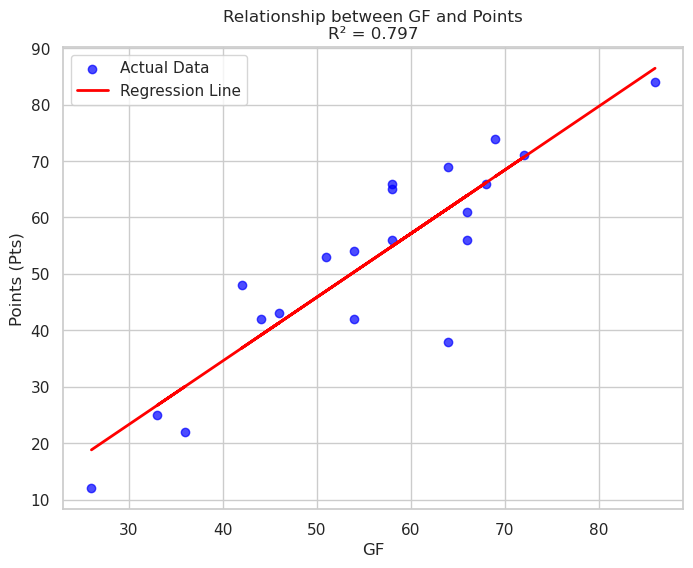

GF: R² = 0.797


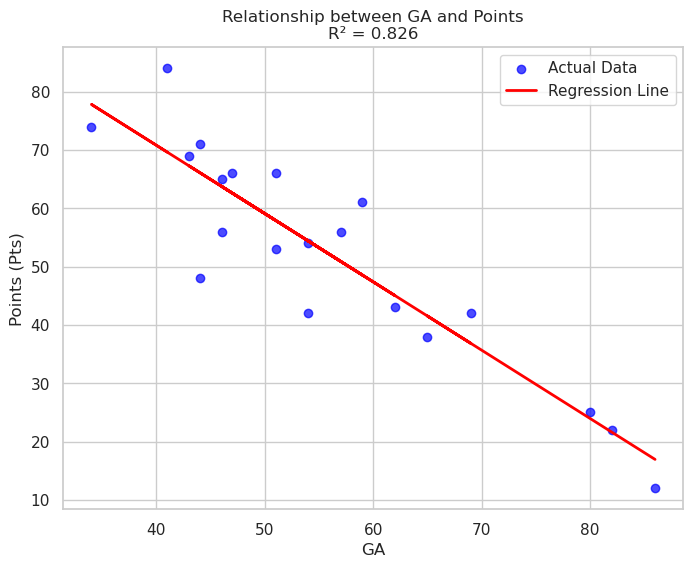

GA: R² = 0.826


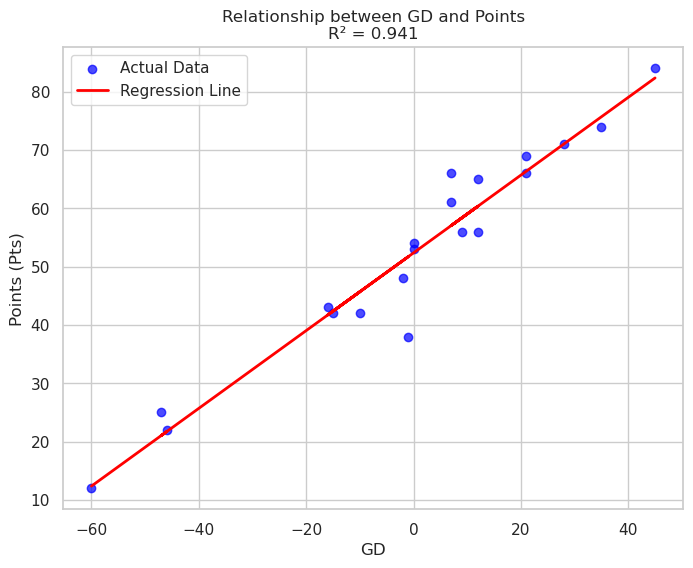

GD: R² = 0.941


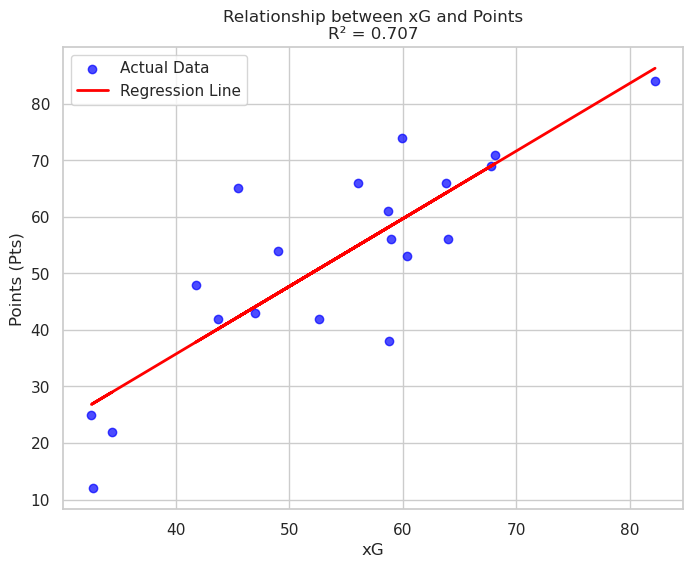

xG: R² = 0.707


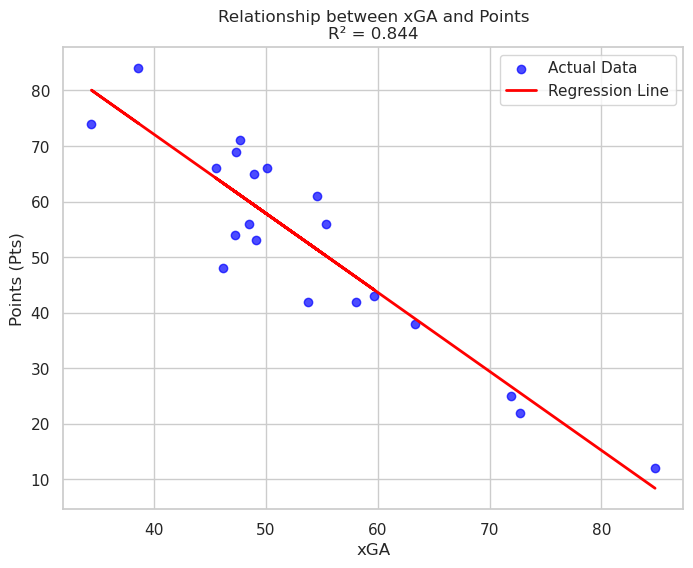

xGA: R² = 0.844


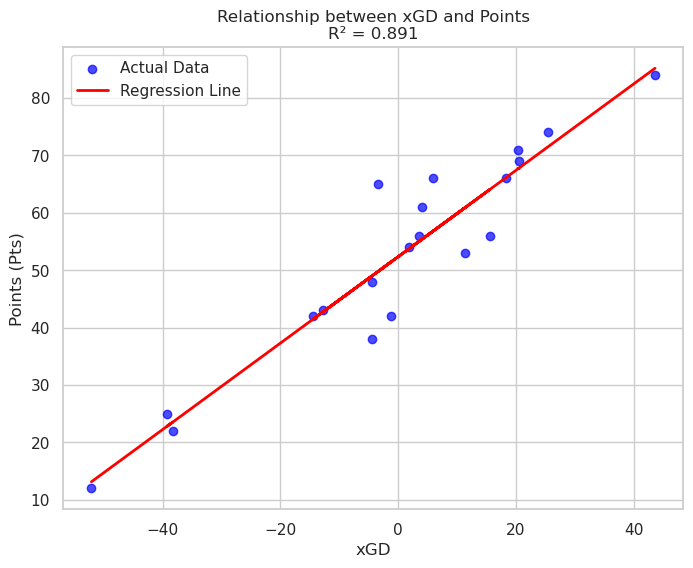

xGD: R² = 0.891


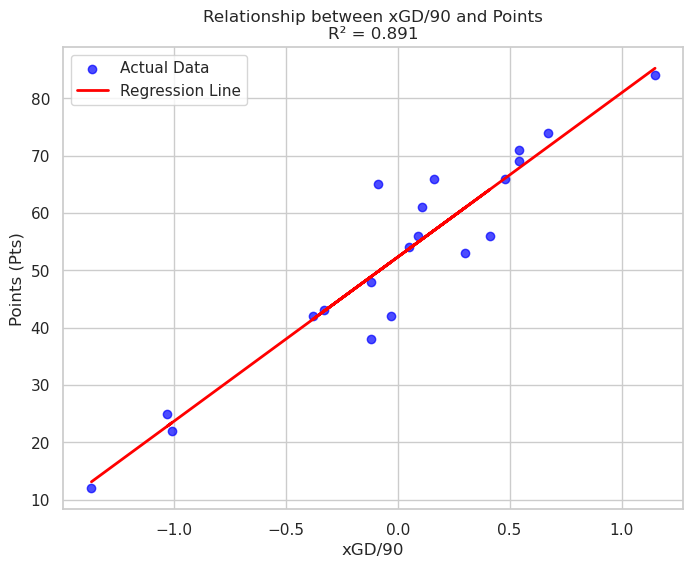

xGD/90: R² = 0.891


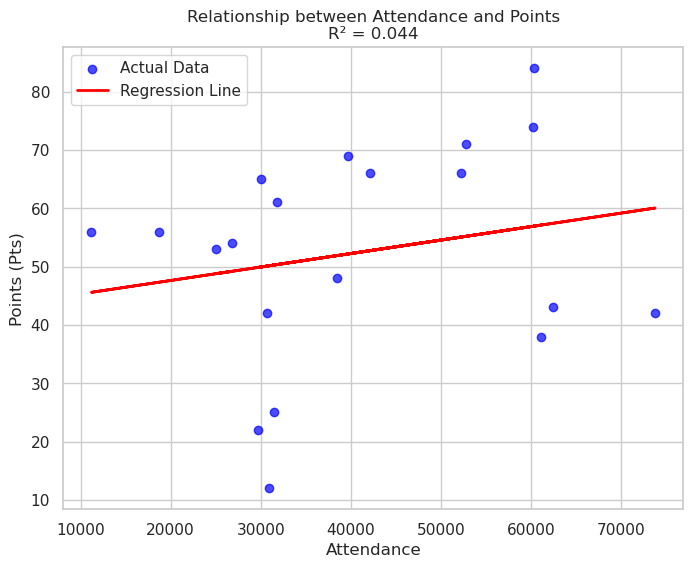

Attendance: R² = 0.044

Features ranked by their correlation with Points:
GD: 0.941
xGD/90: 0.891
xGD: 0.891
xGA: 0.844
GA: 0.826
GF: 0.797
xG: 0.707
Attendance: 0.044

Running multiple regression analysis...

Multiple Regression Coefficients:
      Feature  Coefficient  Absolute_Coefficient
6      xGD/90  1114.015212           1114.015212
5         xGD   -15.934431             15.934431
3          xG   -13.666146             13.666146
4         xGA    13.320825             13.320825
2          GD     0.524564              0.524564
0          GF     0.323593              0.323593
1          GA    -0.200972              0.200972
7  Attendance    -0.000096              0.000096

Overall Model R²: 0.966


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set up visualization style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Load the data from CSV file
# (Make sure the CSV file is in the same directory as your notebook)
try:
    df = pd.read_csv('PremierLeagueSquadData.csv')  # Update with your actual filename
    print("Data loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("Error: File not found. Please ensure:")
    print("1. The CSV file exists in your current working directory")
    print("2. You've specified the correct filename")
    print("3. The file has the correct data format (matching your table)")
except Exception as e:
    print(f"An error occurred while loading the file: {str(e)}")

# 2. Data Cleaning (if needed)
# Ensure column names match exactly what's in your CSV
# If your CSV has different column names, adjust them here:
column_mapping = {
    'GF': 'GF',
    'GA': 'GA',
    'GD': 'GD',
    'Pts': 'Pts',
    'xG': 'xG',
    'xGA': 'xGA',
    'xGD': 'xGD',
    'xGD/90': 'xGD/90',
    'Attendance': 'Attendance'
}

df = df.rename(columns=column_mapping)


# 3. Define function to evaluate each feature's relationship with Points
def evaluate_feature(df, feature, target='Pts'):
    """
    Evaluates the linear relationship between a feature and points.
    Returns R-squared value and shows a regression plot.
    """
    X = df[[feature]].values
    y = df[target].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.7, label='Actual Data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('Points (Pts)')
    plt.title(f'Relationship between {feature} and Points\nR² = {r2:.3f}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return r2

# 4. Evaluate all features
features_to_evaluate = ['GF', 'GA', 'GD', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance']
r2_results = {}

for feature in features_to_evaluate:
    try:
        r2 = evaluate_feature(df, feature)
        r2_results[feature] = r2
        print(f"{feature}: R² = {r2:.3f}")
    except KeyError:
        print(f"Warning: Column '{feature}' not found in dataset. Skipping...")


print("\nFeatures ranked by their correlation with Points:")
sorted_results = sorted(r2_results.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, r2 in sorted_results:
    print(f"{feature}: {r2:.3f}")


print("\nRunning multiple regression analysis...")
try:
    # Select only numeric features that exist in the dataframe
    available_features = [f for f in features_to_evaluate if f in df.columns]
    X = df[available_features]
    y = df['Pts']
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Create a DataFrame with feature coefficients
    coefficients = pd.DataFrame({
        'Feature': available_features,
        'Coefficient': model.coef_,
        'Absolute_Coefficient': np.abs(model.coef_)
    }).sort_values('Absolute_Coefficient', ascending=False)
    
    print("\nMultiple Regression Coefficients:")
    print(coefficients)
    
    # Calculate and print overall model performance
    y_pred = model.predict(X)
    overall_r2 = r2_score(y, y_pred)
    print(f"\nOverall Model R²: {overall_r2:.3f}")
    
except Exception as e:
    print(f"Error in multiple regression: {str(e)}")